In [59]:
# Date: 3/4/2025
# Author: cshinh

# Process:
# 1. Read and process data
# 2. Resample and aggregate index
# 3. Normalize values
# 4. Moving average
# 5. Plot
# 6. Exploratory techniques... SVM?

In [ ]:
import pandas as pd
import numpy as np

h1 = pd.read_csv("./data/hallway1.csv")
h1 = h1.drop(columns=["events"])
h1

In [64]:
def import_csv(name, path):
    dataframe = pd.read_csv(path)

    dataframe = dataframe.drop(columns=["events"])

    dataframe['time'] = pd.to_numeric(dataframe['time'], errors='coerce')
    dataframe['time'] = pd.to_datetime(dataframe['time'], unit='s', origin='unix')
    dataframe.set_index('time', inplace=True)

    dataframe = dataframe.iloc[1:]
    dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
    
    return dataframe

In [1]:
def resample(dataframe):
    dataframe = dataframe.sort_index()  
    
    # Resample to 1ms interval and fill missing values using forward fill
    dataframe_resampled = dataframe.resample('1ms').mean().interpolate(method='nearest')
    return dataframe_resampled


In [83]:
def normalize(dataframe):
    dataframe = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())
    return dataframe

In [56]:
def moving_average(dataframe, window_size):
    if len(dataframe) < window_size:
        return -1
    
    rolling_avg = dataframe.rolling(window=window_size).mean()
    return rolling_avg


In [79]:
df = import_csv("hallway1", "./data/hallway1.csv")
df = resample(df)
ma = moving_average(df,500)

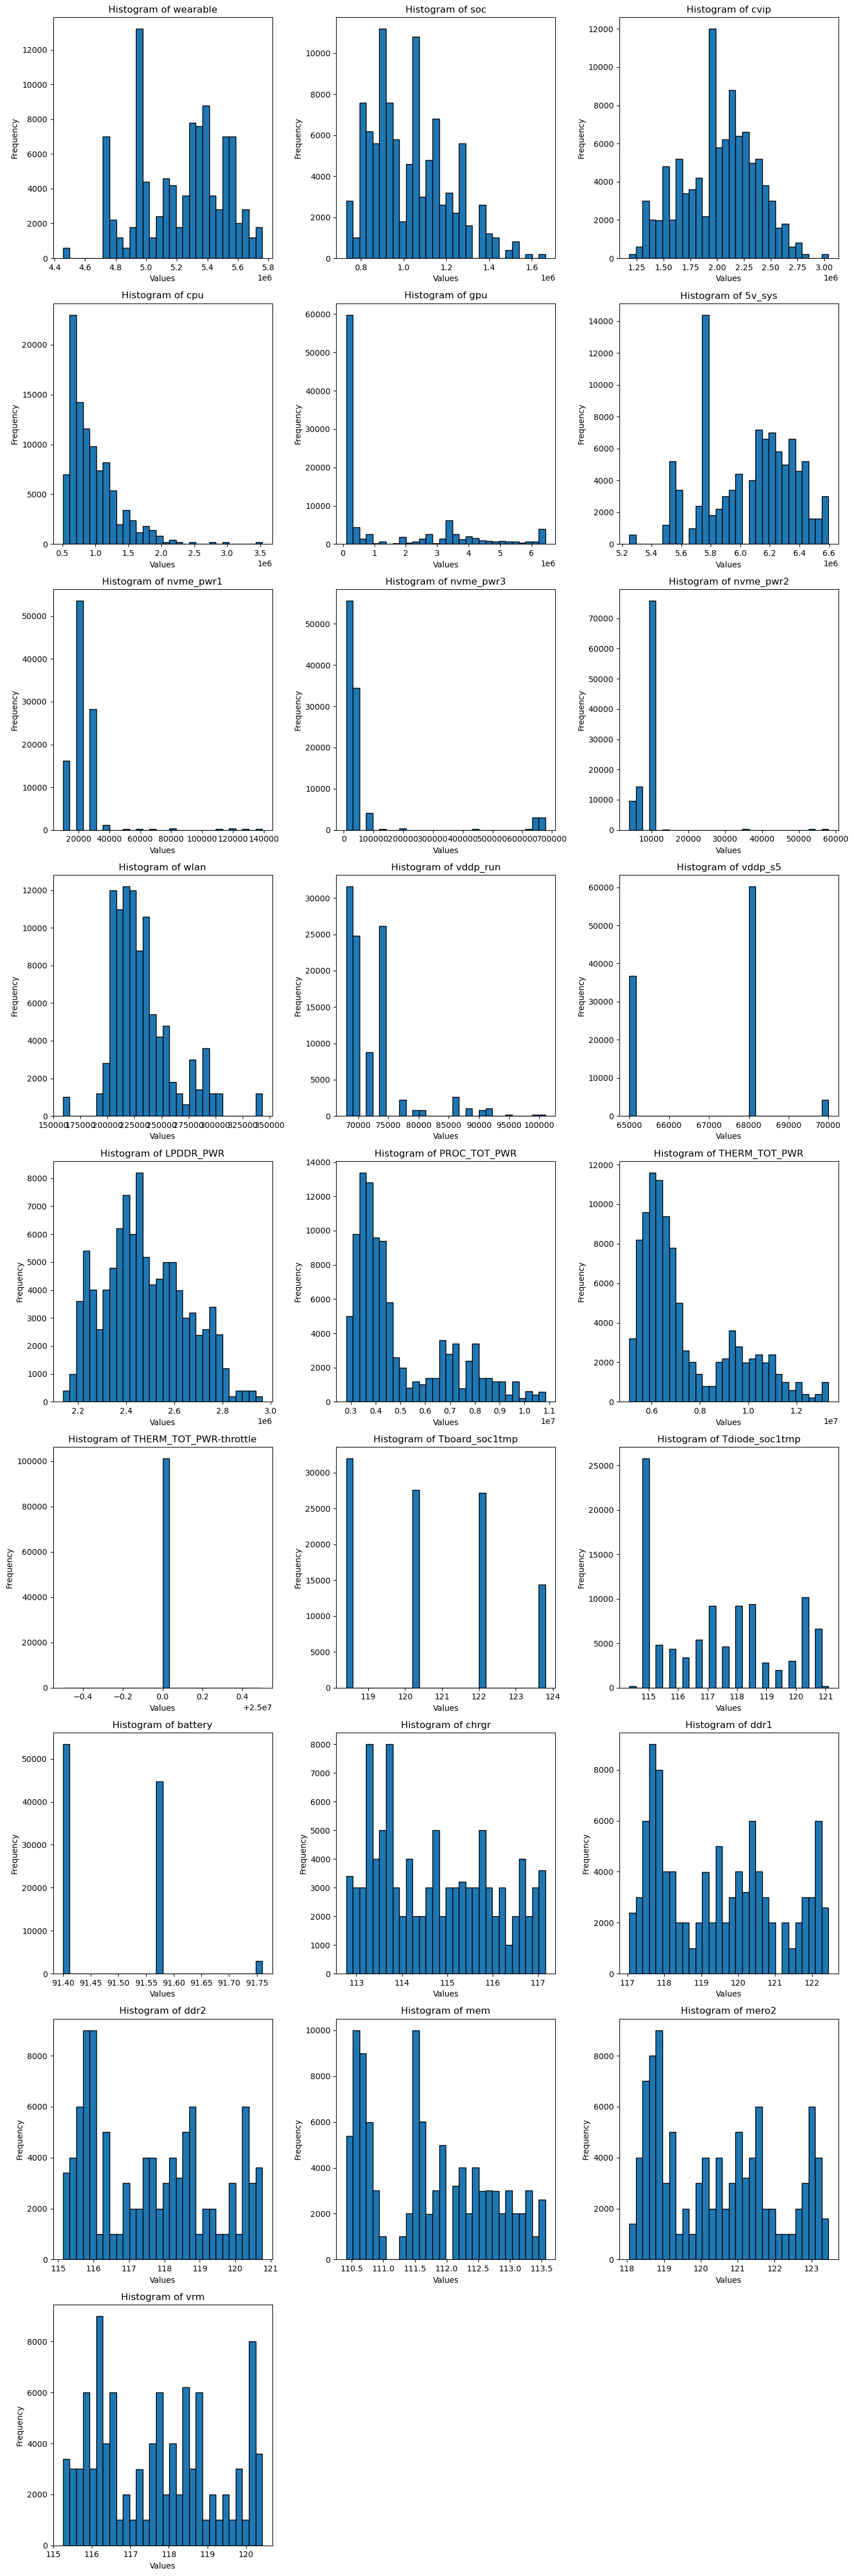

In [ ]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
n_cols = 3  
n_rows = (num_columns // n_cols) + (num_columns % n_cols > 0)  
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black') 
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [90]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
df_scaled = scaler.fit_transform(df)

In [92]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

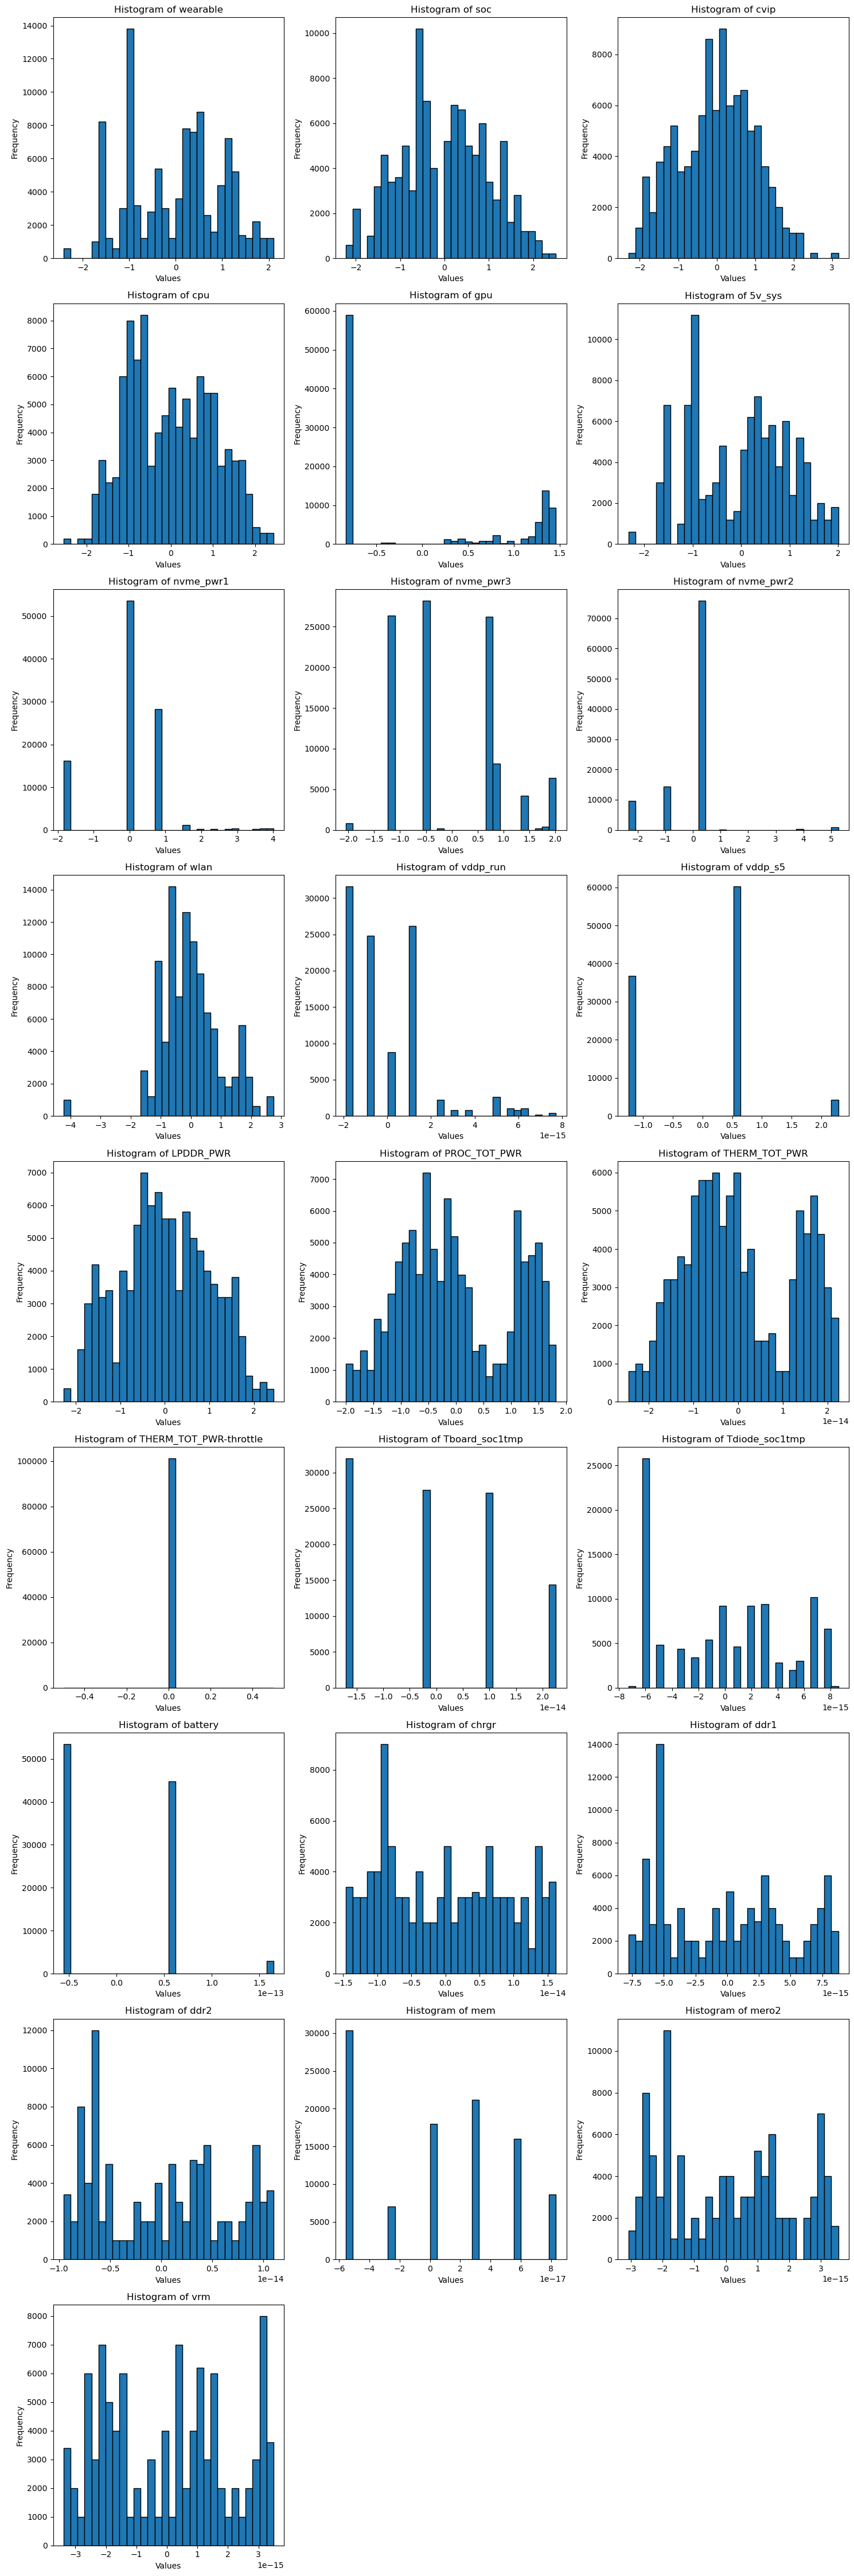

In [ ]:
import matplotlib.pyplot as plt

num_columns = len(df_scaled.columns)
n_cols = 3  # Number of columns in the grid
n_rows = (num_columns // n_cols) + (num_columns % n_cols > 0)  
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(df_scaled.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df_scaled[column].dropna(), bins=30, edgecolor='black')  
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<Axes: xlabel='time'>

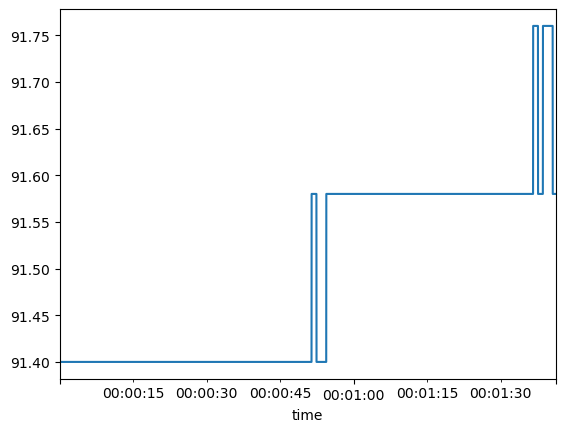

In [84]:
# just plot battery
df['battery'].plot()

<Axes: xlabel='time'>

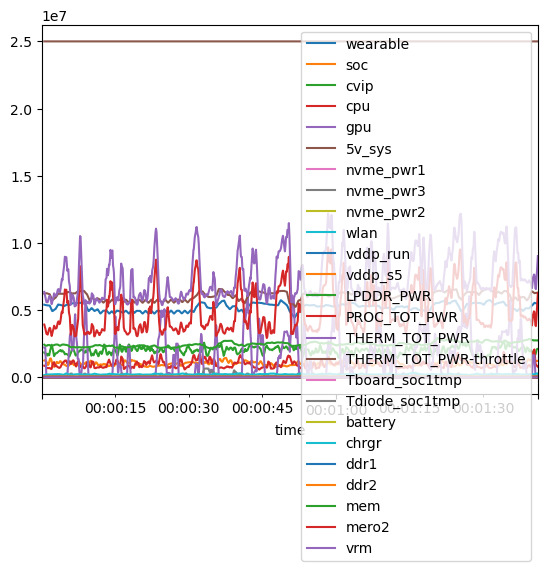

In [80]:
ma.plot()

<Axes: xlabel='time'>

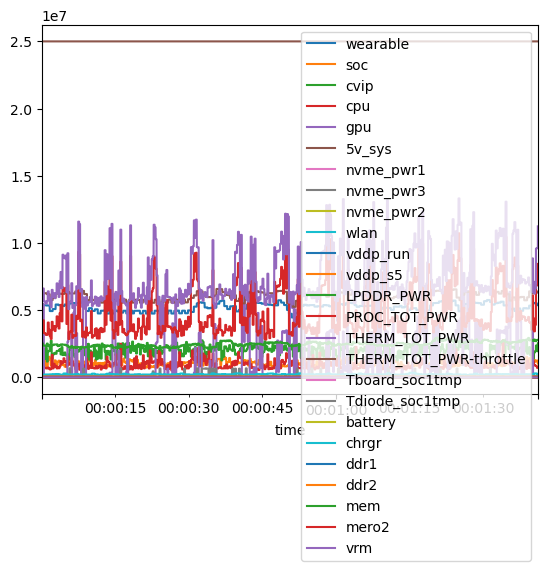

In [74]:
df.plot()